# 02_eda_app_train.ipynb

# Detailed EDA of `application_train.csv`

This notebook performs an in-depth exploratory data analysis **only** on the main training table (`application_train.csv`).  


---


## 1. Setup & Imports

Configure environment, add project root to `sys.path` if needed, and import libraries.


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from creditutils.path_utils import get_project_root

# Plot settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
sns.set_style('whitegrid')

# Define project root
proj_root = get_project_root(levels_up=1)

## 2. Load Data

Read `application_train.csv` into a DataFrame and preview.


In [2]:
DATA_PATH = proj_root / "data" / "application_train.parquet"
app = pd.read_parquet(DATA_PATH)

print("Shape:", app.shape)
app.head()

Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Basic Information

Inspect dtypes, non-null counts, and summary statistics to gauge data scope.

In [3]:
# DataFrame info
app.info(verbose=True)

# Summary statistics for numeric columns
desc_num = app.describe().T
desc_num[['count','mean','std','min','25%','50%','75%','max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


### 3.3 Unique counts per column

Identify high-cardinality features.


In [4]:
unique_counts = app.nunique().sort_values()
unique_counts.head(10), unique_counts.tail(10)

(LIVE_CITY_NOT_WORK_CITY    2
 FLAG_DOCUMENT_18           2
 FLAG_DOCUMENT_14           2
 FLAG_MOBIL                 2
 FLAG_EMP_PHONE             2
 FLAG_WORK_PHONE            2
 FLAG_CONT_MOBILE           2
 FLAG_PHONE                 2
 FLAG_EMAIL                 2
 FLAG_DOCUMENT_15           2
 dtype: int64,
 LIVINGAREA_MODE        5301
 AMT_CREDIT             5603
 DAYS_ID_PUBLISH        6168
 DAYS_EMPLOYED         12574
 AMT_ANNUITY           13672
 DAYS_REGISTRATION     15688
 DAYS_BIRTH            17460
 EXT_SOURCE_1         114584
 EXT_SOURCE_2         119831
 SK_ID_CURR           307511
 dtype: int64)

## 4. Missing Values

Which features have the most missing data?


Columns with missing values:
 COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
dtype: float64


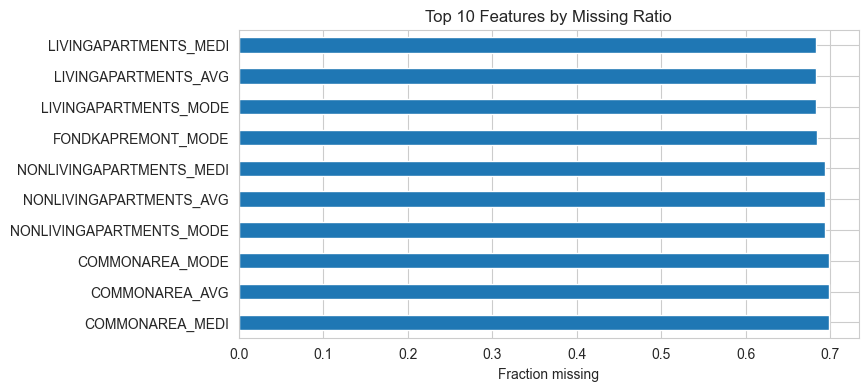

In [ ]:
na_ratio = app.isnull().mean().sort_values(ascending=False)
top_na = na_ratio[na_ratio > 0]  # only those with >0 missing

# Plot top 10
top_na.head(10).plot.barh(title='Top 10 Features by Missing Ratio')
plt.xlabel('Fraction missing')
plt.show()

*Comments:*  
- `EXT_SOURCE_*` missingness may itself hold predictive signal.  
- Many `AMT_REQ_CREDIT_BUREAU_*` and `COMMONAREA_*` features are mostly empty.


## 5. Zero-Value Analysis

Some numeric/categorical fields encode “no activity” as zero.


Top 10 zero-value features:
 FLAG_DOCUMENT_12    0.999993
FLAG_DOCUMENT_10    0.999977
FLAG_DOCUMENT_2     0.999958
FLAG_DOCUMENT_4     0.999919
FLAG_DOCUMENT_7     0.999808
FLAG_DOCUMENT_17    0.999733
FLAG_DOCUMENT_21    0.999665
FLAG_DOCUMENT_20    0.999493
FLAG_DOCUMENT_19    0.999405
FLAG_DOCUMENT_15    0.998790
dtype: float64


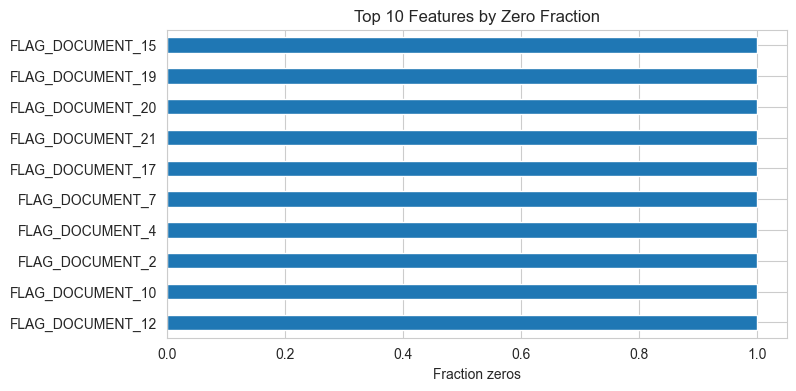

In [ ]:
zero_ratio = (app == 0).mean().sort_values(ascending=False)
top_zero = zero_ratio[zero_ratio > 0].head(10)

# Plot
top_zero.plot.barh(title='Top 10 Features by Zero Fraction')
plt.xlabel('Fraction zeros')
plt.show()

## 6. Data Types & Cardinality

Separate categorical and numeric, inspect top categoricals.


Categorical cols: 16 | Numeric cols: 106


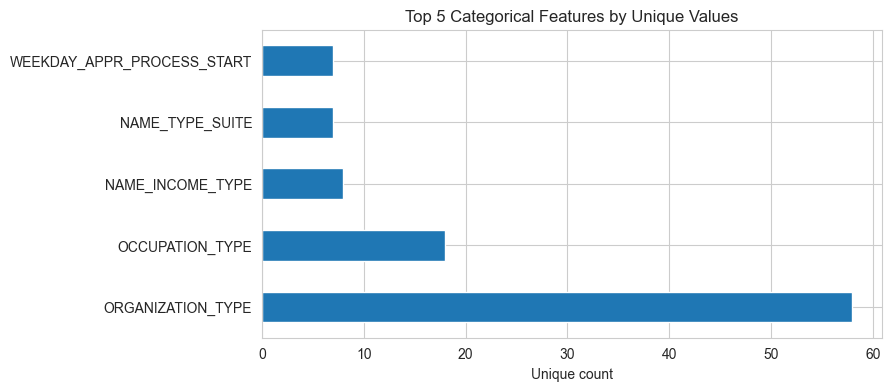

In [7]:
cat_cols = app.select_dtypes(include=['object']).columns.tolist()
num_cols = app.select_dtypes(include=[np.number]).columns.tolist()
print(f"Categorical cols: {len(cat_cols)} | Numeric cols: {len(num_cols)}")

# Top 5 categorical by cardinality
cat_card = app[cat_cols].nunique().sort_values(ascending=False).head(5)
cat_card.plot.barh(title='Top 5 Categorical Features by Unique Values')
plt.xlabel('Unique count')
plt.show()

## 7. Target Variable (`TARGET`)

Examine class balance and basic target statistics.


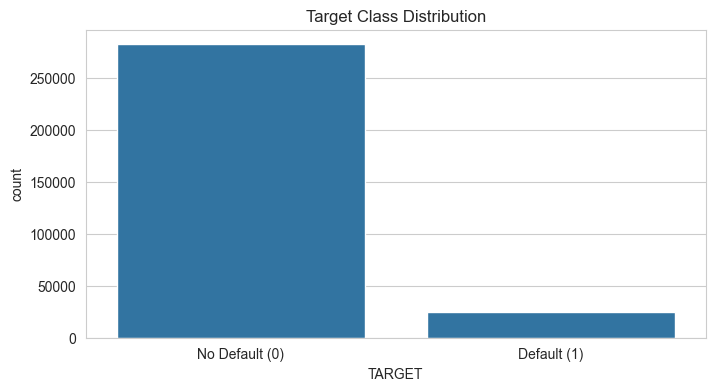

Default rate: 0.08072881945686496


In [8]:
# 7.1 Distribution plot
sns.countplot(x='TARGET', data=app)
plt.xticks([0,1], ['No Default (0)', 'Default (1)'])
plt.title('Target Class Distribution')
plt.show()

# 7.2 Proportion
print("Default rate:", app['TARGET'].mean())

*Insight:*  
- Only ~8% of records are defaults → implement stratified CV later.


## 8. Univariate Analysis of Top Correlated Features

Here we automatically select the 7 numeric features most strongly correlated with `TARGET` (excluding `TARGET` itself), then for each feature plot:

1. A histogram with KDE overlaid, colored by `TARGET` class  
2. A boxplot of feature values by `TARGET` class

This helps us see how each top feature differs between defaulters and non-defaulters.


Top 7 numeric features by |corr| with TARGET:
 ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE']


C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


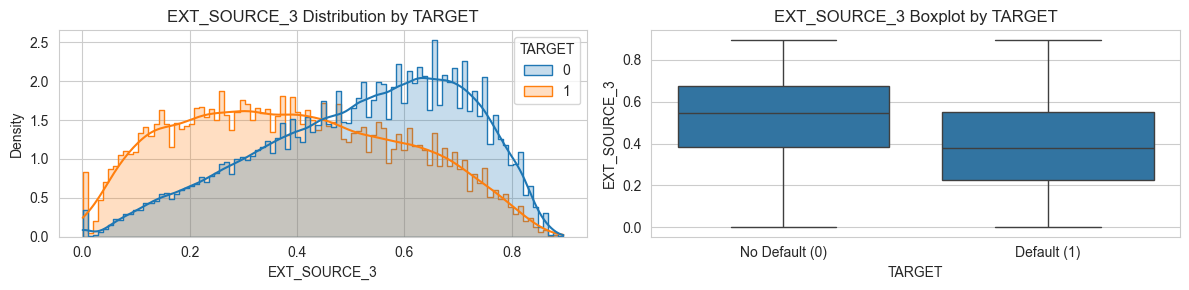

C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


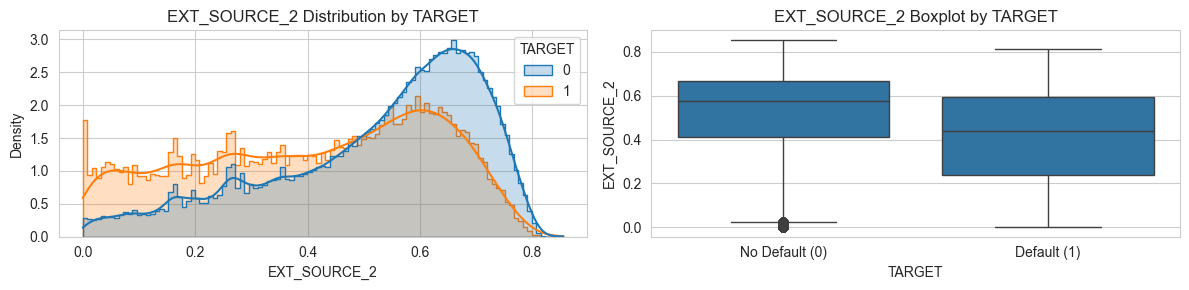

C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


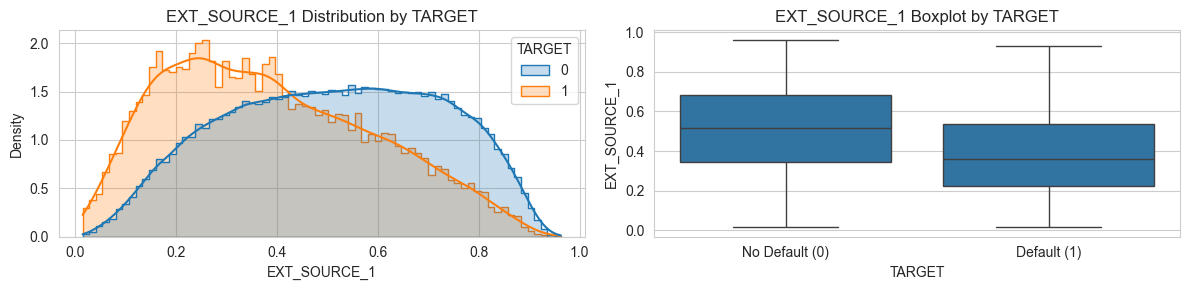

C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


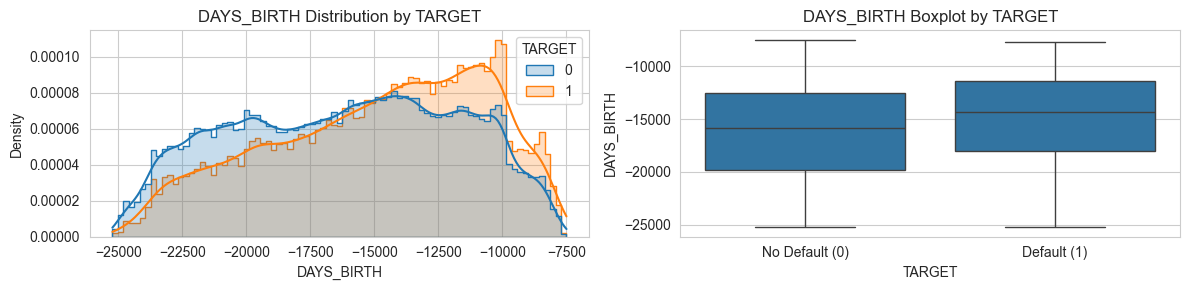

C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


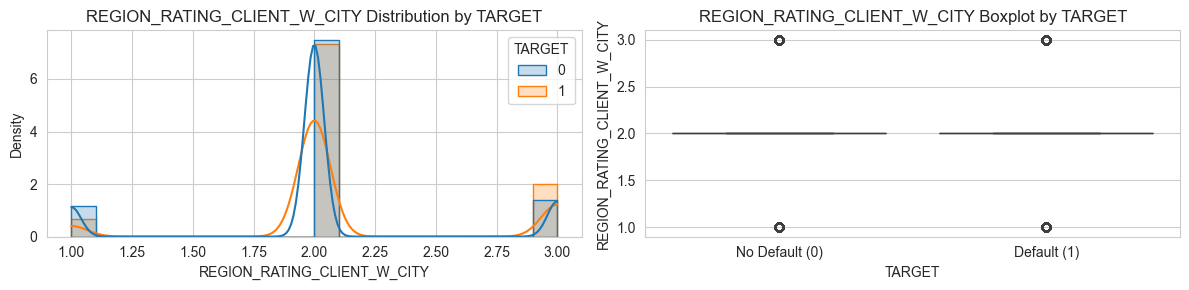

C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


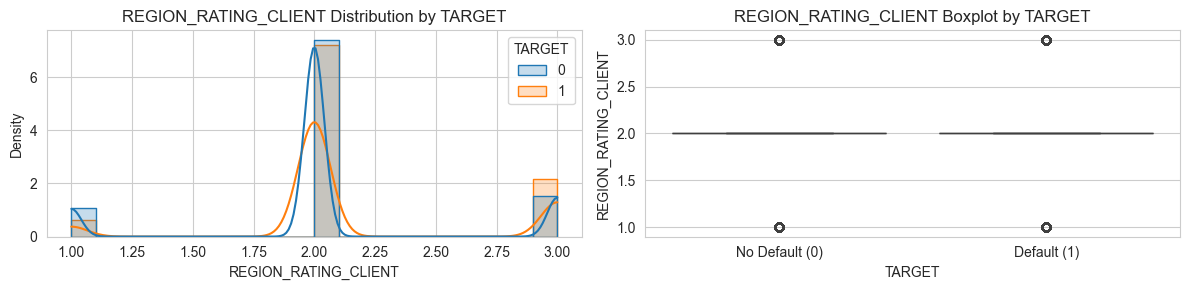

C:\Users\timgr_\AppData\Local\Temp\ipykernel_27304\2592263307.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])


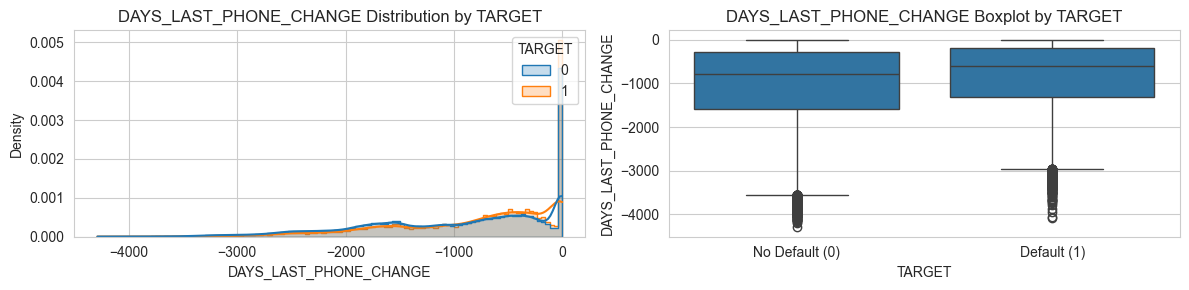

In [15]:
# Compute absolute correlation with TARGET and select top 7 features
numeric_cols = app.select_dtypes(include=['number']).columns.drop('TARGET')
corr_with_target = app[numeric_cols.tolist() + ['TARGET']].corr()['TARGET'].abs()
top7 = corr_with_target.sort_values(ascending=False).iloc[1:8].index.tolist()
print("Top 7 numeric features by |corr| with TARGET:\n", top7)

# Plot for each of the top 7 features
for col in top7:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    # Histogram + KDE by TARGET
    sns.histplot(
        data=app, x=col, hue='TARGET',
        element='step', stat='density', common_norm=False,
        kde=True, ax=axes[0],
        palette=['C0', 'C1'],
        hue_order=[0, 1]
    )
    axes[0].set_title(f'{col} Distribution by TARGET')
    
    # Boxplot by TARGET
    sns.boxplot(x='TARGET', y=col, data=app, ax=axes[1])
    axes[1].set_title(f'{col} Boxplot by TARGET')
    axes[1].set_xticklabels(['No Default (0)', 'Default (1)'])

    plt.tight_layout()
    plt.show()


*Notes:*  
- `DAYS_EMPLOYED` has extreme positive values (e.g. 365243).  
- Income & credit are heavily skewed → consider `log1p`.


## 10. Categorical Feature Analysis (Top 7 by Target Separation)

Automatically find the top 7 categorical features whose categories show the strongest separation in average `TARGET` default rates.  
Then plot default rate by category for each.


Top 7 categorical features by target separation:
 ['NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE']

NAME_INCOME_TYPE default rate:
NAME_INCOME_TYPE
Businessman             0.000000
Student                 0.000000
Pensioner               0.053864
State servant           0.057550
Commercial associate    0.074843
Working                 0.095885
Unemployed              0.363636
Maternity leave         0.400000
Name: TARGET, dtype: float64


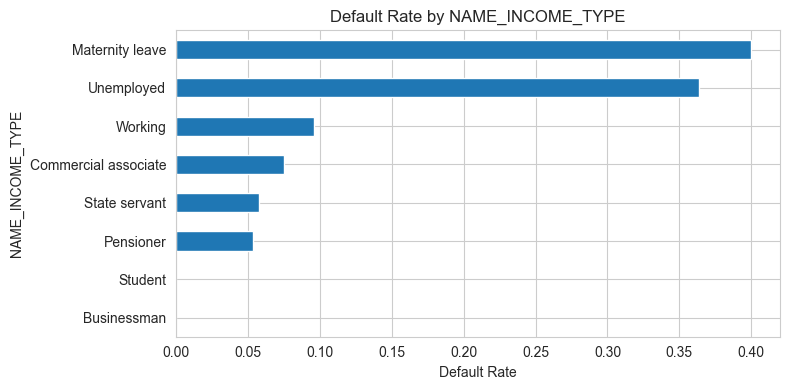


CODE_GENDER default rate:
CODE_GENDER
XNA    0.000000
F      0.069993
M      0.101419
Name: TARGET, dtype: float64


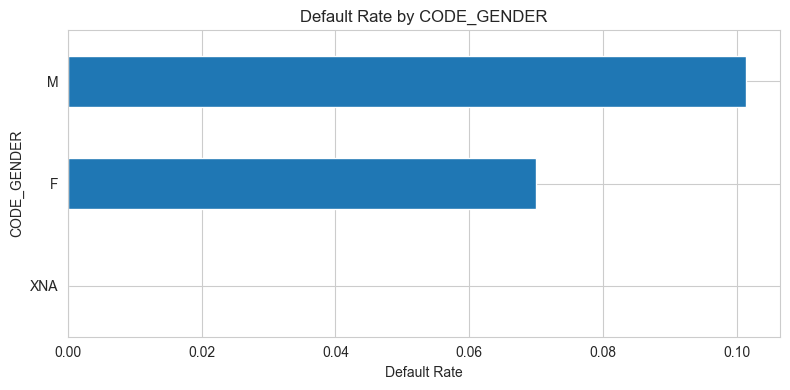


NAME_EDUCATION_TYPE default rate:
NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Secondary / secondary special    0.089399
Lower secondary                  0.109277
Name: TARGET, dtype: float64


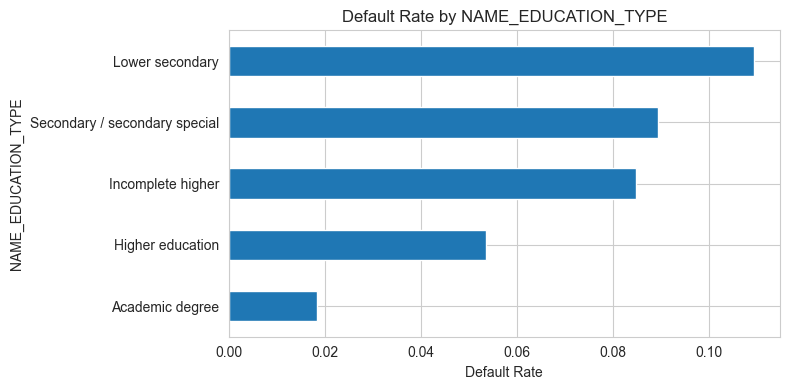


NAME_FAMILY_STATUS default rate:
NAME_FAMILY_STATUS
Unknown                 0.000000
Widow                   0.058242
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Civil marriage          0.099446
Name: TARGET, dtype: float64


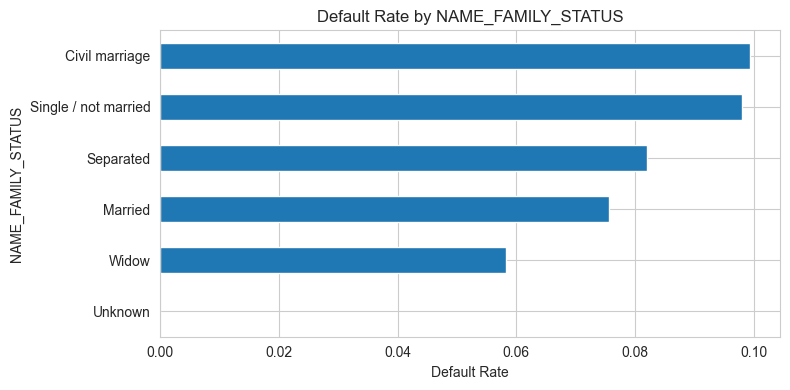


OCCUPATION_TYPE default rate:
OCCUPATION_TYPE
Accountants              0.048303
High skill tech staff    0.061599
Managers                 0.062140
Core staff               0.063040
HR staff                 0.063943
IT staff                 0.064639
Private service staff    0.065988
Medicine staff           0.067002
Secretaries              0.070498
Realty agents            0.078562
Cleaning staff           0.096067
Sales staff              0.096318
Cooking staff            0.104440
Laborers                 0.105788
Security staff           0.107424
Waiters/barmen staff     0.112760
Drivers                  0.113261
Low-skill Laborers       0.171524
Name: TARGET, dtype: float64


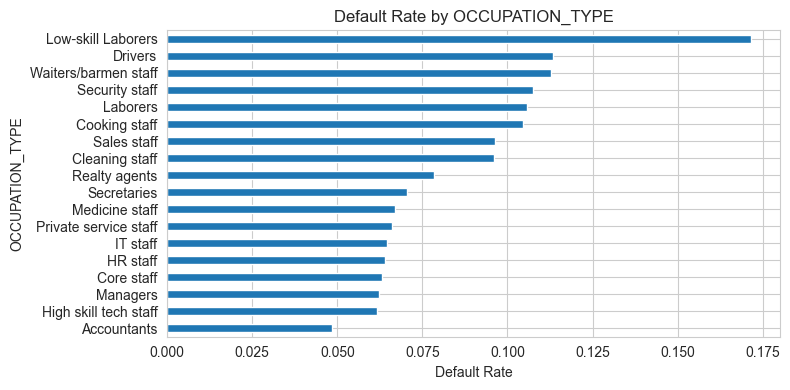


ORGANIZATION_TYPE default rate:
ORGANIZATION_TYPE
Trade: type 4             0.031250
Industry: type 12         0.037940
Transport: type 1         0.044776
Trade: type 6             0.045959
Security Ministries       0.048632
University                0.048983
Police                    0.049979
Military                  0.051253
Bank                      0.051855
XNA                       0.053996
Culture                   0.055409
Insurance                 0.056951
Religion                  0.058824
School                    0.059148
Trade: type 5             0.061224
Hotel                     0.064182
Industry: type 10         0.064220
Medicine                  0.065845
Services                  0.066032
Electricity               0.066316
Industry: type 9          0.066805
Industry: type 5          0.068447
Government                0.069781
Trade: type 2             0.070000
Kindergarten              0.070349
Emergency                 0.071429
Industry: type 6          0.071429
Indu

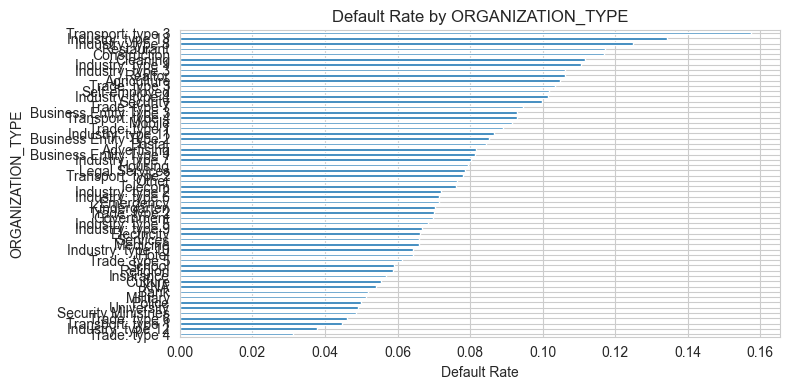


NAME_HOUSING_TYPE default rate:
NAME_HOUSING_TYPE
Office apartment       0.065724
House / apartment      0.077957
Co-op apartment        0.079323
Municipal apartment    0.085397
With parents           0.116981
Rented apartment       0.123131
Name: TARGET, dtype: float64


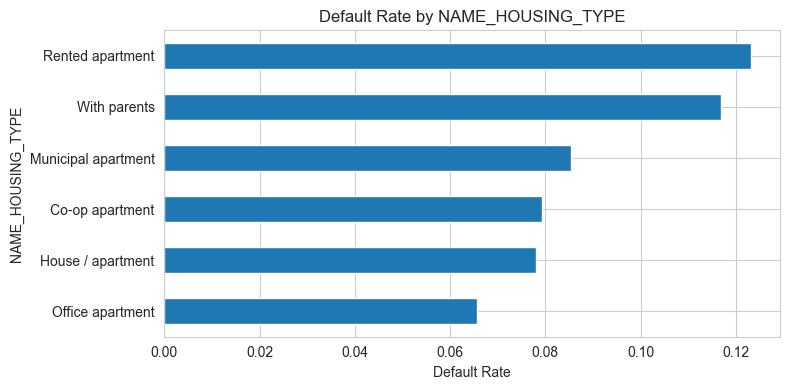

In [17]:
# Compute & plot top 7 categorical features by target separation
import numpy as np

# Get all categorical columns
cat_cols = app.select_dtypes(include='object').columns.tolist()
target_mean = app['TARGET'].mean()

# Compute "target separation score" per categorical feature
cat_separation = {}
for col in cat_cols:
    means = app.groupby(col)['TARGET'].mean()
    if len(means) <= 1:
        continue  # skip single-valued columns
    score = np.average(np.abs(means - target_mean))
    cat_separation[col] = score

# Select top 7 features by score
top7_cat = sorted(cat_separation, key=cat_separation.get, reverse=True)[:7]
print("Top 7 categorical features by target separation:\n", top7_cat)

# Plot default rates
for col in top7_cat:
    rate = app.groupby(col)['TARGET'].mean().sort_values()
    print(f"\n{col} default rate:")
    print(rate)
    rate.plot.barh()
    plt.title(f'Default Rate by {col}')
    plt.xlabel('Default Rate')
    plt.tight_layout()
    plt.show()


### Conclusion

As expected, categories associated with higher default rates include:

- **Singles** (e.g., single marital status, no co-applicant)  
- **Low-income job types** (e.g., laborers, working staff)  
- **Poorer housing situations** (e.g., rented apartments)
- **Lower Education** (e.g. lower secondary)

.
.
.

These patterns align with general risk expectations in credit scoring:  
Lower income and less stability => higher likelihood of default.


## 13. Feature Engineering Ideas

Ideas based on the above EDA:

- **Ratios**: especially for social status but also standard credit metrics ...
- **Interaction**: ext_source mean, max, every single one ...
- **Aggregation**: Sum / mean of binary flags ...
- **Demographics**: Age, Housing situation, Gender, ...
